# Serie A - Pressing


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from matplotlib import cm
import matplotlib.colors as mcolors
from highlight_text import fig_text
import pandas as pd
import numpy as np

from PIL import Image
import urllib
import os

In [3]:
font_path = "assets/fonts/"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("assets/stylesheets/soc_base.mplstyle")


## Leggere il dataframe

In [4]:
df = pd.read_csv('data/set_pieces.csv', index_col=0)
df = df.sort_values(by='SP', ascending=False).reset_index(drop=True)

df

,team_id,Team,SP,OP
0,9885,Juventus,18,29
1,9875,Napoli,17,46
2,8686,Roma,13,27
3,8636,Inter,11,46
4,8524,Atalanta,10,46
5,8535,Fiorentina,10,34
6,9857,Bologna,9,31
7,8600,Udinese,9,30
8,9876,Hellas Verona,8,18
9,8543,Lazio,8,44


In [5]:
'''
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]

'''

'''
gradient = [
'#146cf6',
'#1878cf',
'#01a6c3',
'#00a589',
'#029733',
'#02ac02',
'#899f84',
'#cbc000',
'#d2a900',
'#d88300',
'#d75609',
'#da2908',
'#cb0000'
]
'''
gradient = [
'#146cf6',
'#1878cf',
'#01a6c3',
'#00a589',
'#029733',
'#02ac02',
'#899f84',
'#cbc000',
'#d2a900',
'#d88300',
'#d75609',
'#da2908',
'#cb0000'
]

gradient.reverse()

'''
gradient = [
'#cb0000',
'#da2908',
'#d88300',
'#cbc000',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]
'''
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

In [18]:
def plot_bar(ax, fig, df):

    data = df.copy()
    data = (
        data
        .sort_values(by = "SP", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['SP'].min(),vmax=data['SP'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data['SP'],
        color=cmap(norm(data['SP'])),
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data['SP']):
    
        format_str = f"{value}"
        text_ = ax.annotate(
            xy = (index, value-0.05),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 21, 2)])

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    
    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,20),
        xytext=(6,20),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,20),
        xytext=(13,20),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,20),
        xytext=(6,20),
        text='+ forti su palla inattiva',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,20),
        xytext=(13,20),
        text='- forti su palla inattiva',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

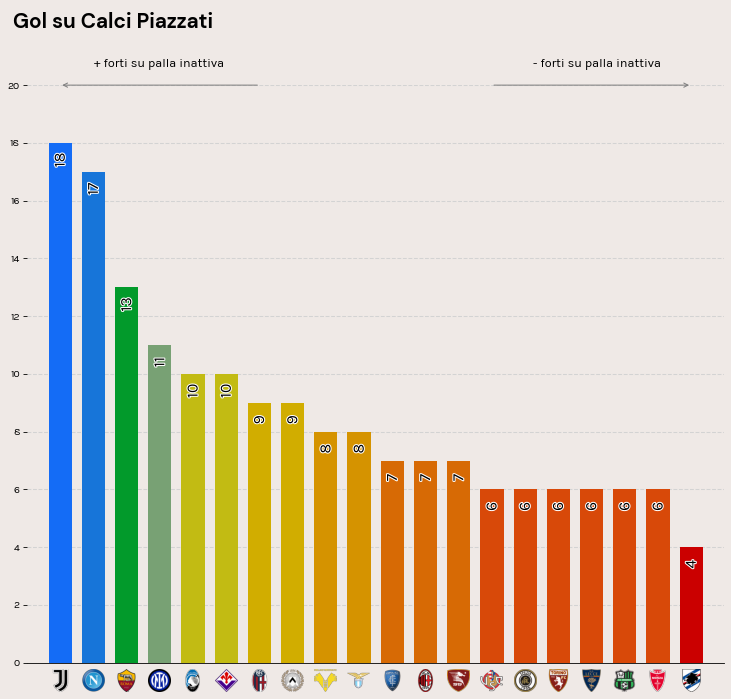

In [19]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_bar(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95,
    s = "Gol su Calci Piazzati",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

plt.savefig(
	"figures/SerieA_SetPieces.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)


In [20]:
df = pd.read_csv('data/set_pieces.csv', index_col=0)
df = df.sort_values(by='SP', ascending=False).reset_index(drop=True)
df

,team_id,Team,SP,OP
0,9885,Juventus,18,29
1,9875,Napoli,17,46
2,8686,Roma,13,27
3,8636,Inter,11,46
4,8524,Atalanta,10,46
5,8535,Fiorentina,10,34
6,9857,Bologna,9,31
7,8600,Udinese,9,30
8,9876,Hellas Verona,8,18
9,8543,Lazio,8,44


In [21]:
def plot_bar(ax, fig, df):

    data = df.copy()
    data = (
        data
        .sort_values(by = "SP", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7
    # We specify the width of the bar
    width_bar = 0.35

    # Fouls conceded
    ax.bar(
        data.index, 
        data['SP'], 
        #ec = "black", 
        lw = .75, 
        color = "#FFB000",
        zorder = 3, 
        width = width_bar,
        label = "Calci Piazzati"
    )

    ax.bar(
        data.index + width_bar, 
        data['OP'], 
        #ec = "black", 
        lw = .75,
        color = "#785EF0",
        zorder = 3, 
        width = width_bar,
        label = "Open Play"
    )
    
    ax.legend(
        ncol = 2, 
        loc = "upper center", 
        bbox_to_anchor = (0.5, 1),
        frameon = False,
        fontsize = 15
    )
    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 51, 10)])

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index-width_bar/2, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")

    # -- Figure title and arrows --------------------------------
    
    ax.annotate(
        xy=(0,110),
        xytext=(6, 110),#ax.get_ylim()[1]),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    ax.annotate(
        xy=(19,110),
        xytext=(13, 110),
        xycoords='data',
        textcoords='data',
        text='',
        arrowprops=dict(arrowstyle='->',color='gray')
    )
    
    ax.annotate(
        xy=(2.8,93),
        xytext=(6, 93),
        text='+ forti su palla inattiva',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    ax.annotate(
        xy=(15.75,93),
        xytext=(13, 93),
        text='- forti su palla inattiva',
        xycoords='data',
        textcoords='offset points',
        ha='center',
        va='center',
        size=12
    )
    

    return ax

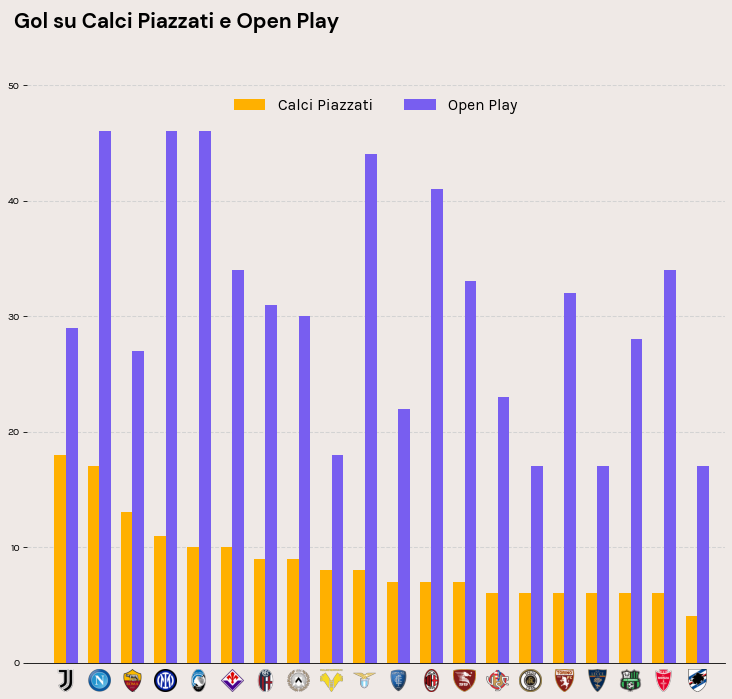

In [23]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_bar(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95,
    s = "Gol su Calci Piazzati e Open Play",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)
plt.show()

In [29]:
def plot_bar(ax, fig, df):

    data = df.copy()
    data = (
        data
        .sort_values(by = "SP", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    # We specify the width of the bar
    width_bar = 0.35

    # Home fouls committed
    ax.bar(
        data.index, 
        data['SP'], 
        lw = .75, 
        color = "#785EF0",
        zorder = 3, 
        width = 0.75,
        label = "Calci Piazzati"
    )

    ax.bar(
        data.index, 
        data['OP'], 
        bottom = data['SP'], # This creates the stacked chart 
        lw = .75,
        color = "#FFB000",       
        zorder = 3, 
        width = 0.75,
        label = "Open Play"
    )
    
    ax.legend(
        ncol = 2, 
        loc = "upper center", 
        bbox_to_anchor = (0.5, 1),
        frameon = False,
        fontsize = 15
    )

    # Annotate the bar charts

    aux_counter = 0
    for y_h, y_a in zip(data['SP'], data['OP']):
        # annotate percentages in the center of the bar
        home_text = ax.annotate(
            xy = (aux_counter, y_h/2),
            text = f"{y_h/(y_h + y_a):.0%}",
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 90
        )

        away_text = ax.annotate(
            xy = (aux_counter, y_h + y_a/2), # Sum of the bottom data for stacked
            text = f"{y_a/(y_h + y_a):.0%}",
            size = 12,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 90
        )
        
        home_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground="black"), path_effects.Normal()]
        )

        away_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground="black"), path_effects.Normal()]
        )
        
        aux_counter += 1

    
    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    #ax.spines["bottom"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([x for x in range(0, 71, 10)])


    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index-0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")
    

    return ax

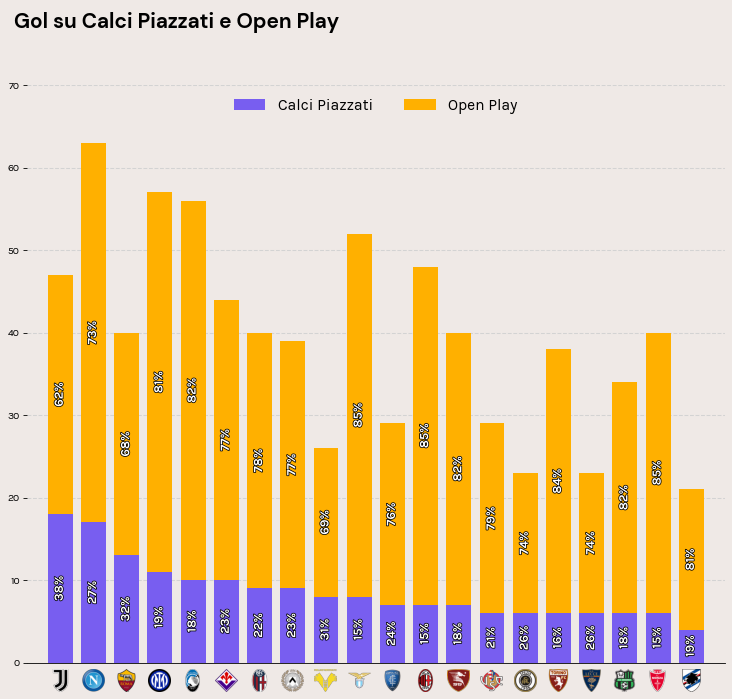

In [30]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_bar(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95,
    s = "Gol su Calci Piazzati e Open Play",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

plt.savefig(
	"figures/SerieA_SP_OP.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)


In [31]:
df["ratio"] = df["SP"]/35
df['ratio'] = np.round(df['ratio'], decimals=2)
df = df.sort_values(by = "ratio", ascending = False)

# We define our series to be plotted
ratio = df["ratio"].reset_index(drop = True)
df

,team_id,Team,SP,OP,ratio
0,9885,Juventus,18,29,0.51
1,9875,Napoli,17,46,0.49
2,8686,Roma,13,27,0.37
3,8636,Inter,11,46,0.31
4,8524,Atalanta,10,46,0.29
5,8535,Fiorentina,10,34,0.29
6,9857,Bologna,9,31,0.26
7,8600,Udinese,9,30,0.26
8,9876,Hellas Verona,8,18,0.23
9,8543,Lazio,8,44,0.23


In [32]:
gradient = [
'#146cf6',
'#1878cf',
'#01a6c3',
'#00a589',
'#029733',
'#02ac02',
'#899f84',
'#cbc000',
'#d2a900',
'#d88300',
'#d75609',
'#da2908',
'#cb0000'
]

gradient.reverse()

soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\vince\AppData\Local\Temp\ipykernel_27136\592027923.py:20: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


In [48]:
def plot_inequality(ax, fig, df):
    data = df.copy()
    data = (
        data
        .sort_values(by = "ratio", ascending = False)
        .reset_index(drop = True)
    )
    width = 0.7

    # Declare CMAP & Normalization
    norm = mcolors.Normalize(vmin=data['ratio'].min(),vmax=data['ratio'].max())
    cmap = plt.get_cmap('SOC')
    ax.bar(
        data.index, 
        data['ratio'],
        color=cmap(norm(data['ratio'])),
        zorder = 3, 
        width = width
    )

    for index, value in enumerate(data['ratio']):
    
        format_str = f"{value}"
        text_ = ax.annotate(
            xy = (index, value-0.01),
            xytext = (1, -15),
            text = format_str,
            textcoords = "offset points",
            rotation = 90,
            ha = "center",
            va = "center",
            color = "black",
            size = 15
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=2, foreground="white"), 
            path_effects.Normal()]
        )

    # --- Axes transformations
    ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
    ax.set_xlim(-1, 20)
    ax.spines["top"].set(visible = False)
    ax.spines["right"].set(visible = False)
    ax.spines["left"].set(visible = False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks(np.arange(0, 0.61, 0.1))

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform

    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
    for index, teamId in enumerate(data["team_id"]):
        ax_coords = DC_to_NFC([index - 0.35, -ax.get_ylim()[1]*.05])
        logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "W")
        club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
        logo_ax.imshow(club_icon)
        logo_ax.axis("off")

    return ax

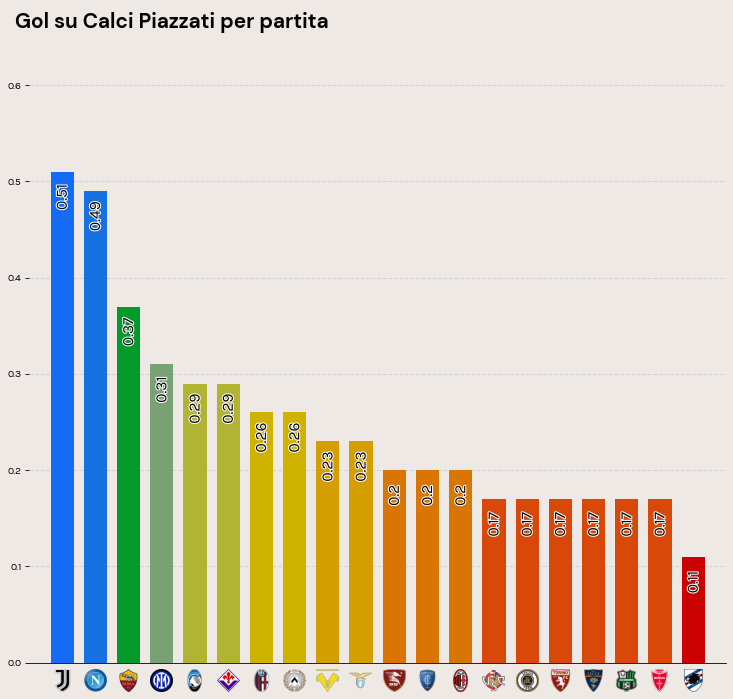

In [49]:
fig = plt.figure(figsize=(12,10), dpi=75)
ax = plt.subplot()
plot_inequality(ax, fig, df)

fig_text(
    x = 0.11, y = 0.95, #1.035, 
    s = "Gol su Calci Piazzati per partita",
    va = "bottom", ha = "left",
    fontsize = 20, color = "black", font = "DM Sans", weight = "bold"
)

plt.show()